## **Prueba** - Análisis Estadístico

La OMS estima que cada año se producen 12 millones de muertes en todo el mundo debido a enfermedades cardíacas, producidas en su gran mayoría por enfermedades cardiovasculares. El pronóstico temprano de las enfermedades cardiovasculares puede ayudar en la toma de decisiones sobre cambios en el estilo de vida en pacientes de alto riesgo y reducir las complicaciones. La base de datos cardio.csv contiene mediciones realizadas a pacientes hace 10 años, entre los cuales se encuentran

* **Sex:** M - F
* **Age:** edad
* **Education:** codificada, considerando que un valor más alto corresponde a un mayor nivel educativo.
* **currentSmoker:** si el paciente es o no fumador actual
* **cigsPerDay:** el número de cigarrillos que la persona fumaba en promedio en un día.
* **BPMeds:** si el paciente estaba tomando medicamentos para la presión arterial (0: No, 1: Sí)
* **prevalenStroke:** si el paciente había tenido un accidente cerebrovascular previamente (0: No, 1: Sí)
* **prevalentHyp:** si el paciente era hipertenso o no (0: No, 1: Sí)
* **diabetes:** si el paciente tenía diabetes o no (0: No, 1: Sí)
* **totChol:** nivel de colesterol total
* **sysBP:** presión arterial sistólica
* **diaBP_BMI:** presión arterial diastólica
* **BMI:** Índice de masa corporal
* **heartRate:** ritmo cardíaco
* **glucose:** nivel de glucosa
* **TenYearCHD:** se indica si el paciente sufrió o no una enfermedad coronaria en los últimos 10 años.(0: No, 1: Sí)

### **Pregunta N°1**

Carga los datos y explóralos. Elimina los datos nulos o incorrectos

In [96]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

In [3]:
# Importación DataSet
df = pd.read_csv("cardio.csv")
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [28]:
# Verificación de datos faltantes y su tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3656 non-null   object 
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   object 
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 485.6+ KB


In [29]:
# Eliminamos registros que contengan almenos un campo null
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3656 non-null   object 
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   object 
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 485.6+ KB


### **Pregunta N°2**
Escoge tres variables cuantitativas y realiza un análisis descriptivo de ellas, utilizando indicadores y gráficos. ¿Cuaĺ presenta mayor dispersión?

In [34]:
selected_features = df[['age','totChol','BMI']]
selected_features.describe()

,age,totChol,BMI
count,3656.000000,3656.000000,3656.000000
mean,49.557440,236.873085,25.784185
std,8.561133,44.096223,4.065913
min,32.000000,113.000000,15.540000
25%,42.000000,206.000000,23.080000
50%,49.000000,234.000000,25.380000
75%,56.000000,263.250000,28.040000
max,70.000000,600.000000,56.800000


Observamos que los 3 campos seleccionados, poseen una mediana muy similar a la media, lo que nos sugiere que siguen una distribución normal. Para esto realizaremos una prueba empírica para poder verificar si siguen dicho comportamiento:


In [51]:
# Regla Empírica: Valores teóricos en una distribución normal
print(f"Concentración de los datos teóricos entre -1 y 1 desviación standard: {float(round((norm.cdf(1) - norm.cdf(-1)) * 100,2))}%.")
print(f"Concentración de los datos teóricos entre -2 y 2 desviación standard: {float(round((norm.cdf(2) - norm.cdf(-2)) * 100,2))}%.")
print(f"Concentración de los datos teóricos entre -3 y 3 desviación standard: {float(round((norm.cdf(3) - norm.cdf(-3)) * 100,2))}%.")

Concentración de los datos teóricos entre -1 y 1 desviación standard: 68.27%.
Concentración de los datos teóricos entre -2 y 2 desviación standard: 95.45%.
Concentración de los datos teóricos entre -3 y 3 desviación standard: 99.73%.


In [71]:
# Regla Empírica: Valores reales de variable "Age"
total = selected_features.shape[0]
media = selected_features['age'].mean()
sigma = selected_features['age'].std()

for i in range(3):
    print(f"Concentración de los datos reales entre -{i+1} y {i+1} desviación standard: {round(100 * (len(selected_features[(selected_features['age'] >= (media - (i+1)*sigma)) & (selected_features['age'] <= (media + (i+1)*sigma))]) / total),2)}%.")

Concentración de los datos reales entre -1 y 1 desviación standard: 63.29%.
Concentración de los datos reales entre -2 y 2 desviación standard: 98.33%.
Concentración de los datos reales entre -3 y 3 desviación standard: 100.0%.


In [72]:
# Regla Empírica: Valores reales de variable "totChol"
total = selected_features.shape[0]
media = selected_features['totChol'].mean()
sigma = selected_features['totChol'].std()

for i in range(3):
    print(f"Concentración de los datos reales entre -{i+1} y {i+1} desviación standard: {round(100 * (len(selected_features[(selected_features['totChol'] >= (media - (i+1)*sigma)) & (selected_features['totChol'] <= (media + (i+1)*sigma))]) / total),2)}%.")

Concentración de los datos reales entre -1 y 1 desviación standard: 70.3%.
Concentración de los datos reales entre -2 y 2 desviación standard: 96.39%.
Concentración de los datos reales entre -3 y 3 desviación standard: 99.4%.


In [73]:
# Regla Empírica: Valores reales de variable "BMI"
total = selected_features.shape[0]
media = selected_features['BMI'].mean()
sigma = selected_features['BMI'].std()

for i in range(3):
    print(f"Concentración de los datos reales entre -{i+1} y {i+1} desviación standard: {round(100 * (len(selected_features[(selected_features['BMI'] >= (media - (i+1)*sigma)) & (selected_features['BMI'] <= (media + (i+1)*sigma))]) / total),2)}%.")

Concentración de los datos reales entre -1 y 1 desviación standard: 72.98%.
Concentración de los datos reales entre -2 y 2 desviación standard: 95.84%.
Concentración de los datos reales entre -3 y 3 desviación standard: 98.61%.


Al comparar los resultados reales versus a la concentración teórica que se debiese presentar, observamos que estos datos **no siguen el comportamiento de una distribución normal**. En los 3 casos podemos observar un sesgo positivo (a pesar de ser bastante similares).

Para poder realizar la comparación de qué columna presenta una dispersión más amplia podemos realizar una comparativa mediante el cálculo de el `Coeficiente de Variación` para cada una de estas y así poder comparar peras con manzanas:

In [76]:
# CV age
cv_age = selected_features['age'].std() / selected_features['age'].mean()
# CV totChol
cv_totchol = selected_features['totChol'].std() / selected_features['totChol'].mean()
# CV BMI
cv_bmi = selected_features['BMI'].std() / selected_features['BMI'].mean()

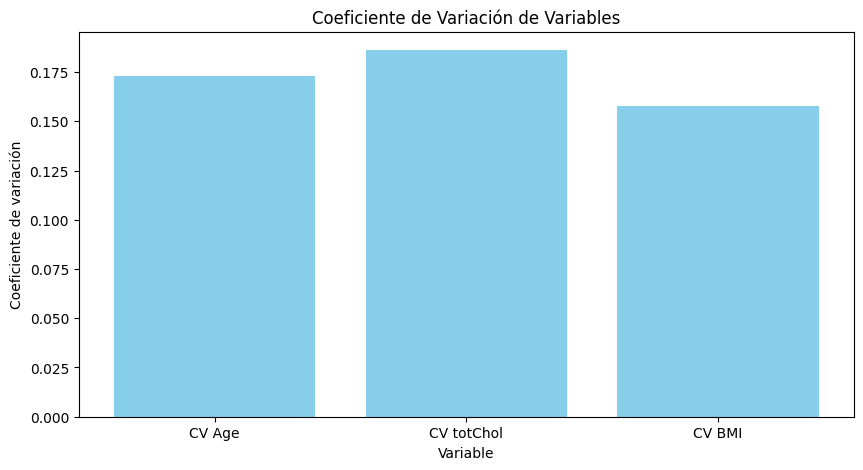

In [110]:
plt.figure(figsize=(10,5))

# Info
labels = ['CV Age', 'CV totChol', 'CV BMI']
values = [cv_age, cv_totchol, cv_bmi]

# Barplot Vertical
plt.bar(labels, values, color='skyblue')
plt.xlabel('Variable')
plt.ylabel('Coeficiente de variación')
plt.title('Coeficiente de Variación de Variables')
plt.show()

El resultado nos indica que la columna **CV totChol**  es la que mayor dispersión presenta en sus datos.